In [1]:
import pandas as pd
import numpy as np

## load the data as a tab-delimited file
data = pd.read_csv("Medicare_Provider_Util_Payment_PUF_CY2018.txt", sep='\t', dtype={'nppes_provider_zip':str})

## Drop the first row, and generate 3-line preview
data = data.drop(0)

data

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,...,hcpcs_code,hcpcs_description,hcpcs_drug_indicator,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standard_amt
1,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,99217,Hospital observation care on day of discharge,N,68.0,67.0,68.0,73.821029,381.308824,57.880294,58.212500
2,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,99218,"Hospital observation care, typically 30 minutes",N,19.0,19.0,19.0,100.883158,476.947368,76.795263,77.469474
3,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,99220,"Hospital observation care, typically 70 minutes",N,26.0,26.0,26.0,188.110769,1086.923077,147.479231,147.793462
4,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,99221,"Initial hospital inpatient care, typically 30 ...",N,24.0,24.0,24.0,102.240000,474.583333,80.155000,80.943333
5,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,99222,"Initial hospital inpatient care, typically 50 ...",N,17.0,17.0,17.0,138.045882,625.000000,108.225294,109.220000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9961861,1992999825,DESCHENES,GEOFFREY,R,M.D.,M,I,1100 9TH AVE,MS:M4-PFS,SEATTLE,...,99203,"New patient office or other outpatient visit, ...",N,83.0,83.0,83.0,118.590000,278.000000,79.778795,74.527590
9961862,1992999825,DESCHENES,GEOFFREY,R,M.D.,M,I,1100 9TH AVE,MS:M4-PFS,SEATTLE,...,99204,"New patient office or other outpatient visit, ...",N,61.0,61.0,61.0,138.880000,268.000000,96.324590,91.376066
9961863,1992999825,DESCHENES,GEOFFREY,R,M.D.,M,I,1100 9TH AVE,MS:M4-PFS,SEATTLE,...,99204,"New patient office or other outpatient visit, ...",N,105.0,105.0,105.0,179.730000,419.000000,123.332381,118.257524
9961864,1992999825,DESCHENES,GEOFFREY,R,M.D.,M,I,1100 9TH AVE,MS:M4-PFS,SEATTLE,...,99214,Established patient office or other outpatient...,N,75.0,62.0,75.0,84.390000,126.000000,59.456133,56.320667


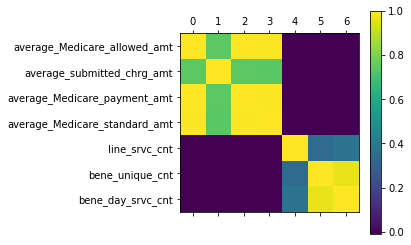

In [2]:
import matplotlib
import matplotlib.pyplot as plt

## Find out the correlation among continuous variables
data_num = data[["average_Medicare_allowed_amt","average_submitted_chrg_amt",\
                 "average_Medicare_payment_amt","average_Medicare_standard_amt",\
                 "line_srvc_cnt","bene_unique_cnt","bene_day_srvc_cnt"]]
plt.matshow(data_num.corr())
plt.yticks(range(len(data_num.columns)), data_num.columns)
plt.colorbar()
plt.show()

In [3]:
## Based on the correlation:
# "number of services" are not highly correlated with any
# all money-related variables are correlated (r^2 > 0.7)
# calculate bene_day_srvc_cnt * standard_amount to prepare for weighted average
num_sum_col = data["bene_day_srvc_cnt"] * data["average_Medicare_standard_amt"]
data["total_std_amt"] = num_sum_col

# aggregate function
agg_function = dict.fromkeys(data,'sum')
agg_function.update(dict.fromkeys(data.columns[data.dtypes.eq(object)], 'first'))
agg_function.update({'npi':'first'})
agg_function.update({'total_std_amt':'sum'})

# Group the data by NPI
data_agg = data.groupby(data['npi'], as_index=False).aggregate(agg_function)
data_agg.reset_index(drop=True)
data_agg

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,...,hcpcs_description,hcpcs_drug_indicator,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standard_amt,total_std_amt
0,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,Hospital observation care on day of discharge,N,1192.0,852.0,1192.0,1394.224892,7446.776761,1084.808674,1098.695798,101301.160000
1,1003000134,CIBULL,THOMAS,L,M.D.,M,I,2650 RIDGE AVE,EVANSTON HOSPITAL,EVANSTON,...,Pathology examination of tissue using a micros...,N,7283.0,4369.0,5350.0,403.835891,1691.545493,311.539569,303.750929,151876.510402
2,1003000142,KHALIL,RASHID,NaN,M.D.,M,I,4126 N HOLLAND SYLVANIA RD,SUITE 220,TOLEDO,...,Aspiration and/or injection of major joint or ...,N,1256.0,779.0,1196.0,2216.157457,4119.041449,1552.154091,1632.937971,77652.938285
3,1003000407,GIRARDI,DAVID,J,D.O.,M,I,100 HOSPITAL RD,NaN,BROOKVILLE,...,Hospital observation care on day of discharge,N,412.0,305.0,412.0,1132.230000,2030.207945,868.829697,901.767576,34261.770000
4,1003000423,VELOTTA,JENNIFER,A,M.D.,F,I,11100 EUCLID AVE,NaN,CLEVELAND,...,Established patient office or other outpatient...,N,85.0,82.0,85.0,151.110000,190.000000,127.261765,134.542183,3586.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061273,1992999551,MOLAI,INDIRA,NaN,M.D.,F,I,625 E GRAND AVE,NaN,ESCONDIDO,...,Automated urinalysis test,N,970.0,618.0,969.0,774.598324,1493.905125,653.790758,636.045363,58622.132666
1061274,1992999569,YUEN,JENNY,F,"O.D., F.A.A.O",F,I,515 GOUGH ST,NaN,SAN FRANCISCO,...,Eye and medical examination for diagnosis and ...,N,70.0,60.0,70.0,397.800000,497.750000,241.197048,199.745871,3416.410000
1061275,1992999759,SORIANO,DINO,V,RN MSN HSA FNP-C,M,I,171 CLOVER POINT CIR,NaN,GUYTON,...,Insertion of needle into vein for collection o...,N,127.0,102.0,127.0,288.114579,894.755271,162.299304,170.223684,5083.020000
1061276,1992999775,"SPINE SURGERY CENTER OF EUGENE, LLC",NaN,NaN,NaN,NaN,O,1410 OAK ST,SUITE 300,EUGENE,...,Injection of substance into spinal canal of up...,N,200.0,146.0,173.0,3761.076793,16500.000000,2928.737633,2723.143653,66067.491956


In [15]:
## data cleaning 1 -- continuous variable outliers removal by z-score

from scipy import stats

# Calculate average std_amt = total_std_amt / total_beneficiaries
num_avg_col = data_agg["total_std_amt"] / data_agg["bene_day_srvc_cnt"]
data_agg["avg_std_amt"] = num_avg_col

## Remove outliers on numeric columns by Z-score
num_var = ["average_Medicare_allowed_amt","average_submitted_chrg_amt",\
           "average_Medicare_payment_amt","average_Medicare_standard_amt",\
           "line_srvc_cnt","bene_unique_cnt","bene_day_srvc_cnt","avg_std_amt"]

for item in num_var:
    data_agg = data_agg[(np.abs(stats.zscore(data_agg[item])) < 3)]

data_agg = data_agg.reset_index(drop=True)
data_agg

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,...,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standard_amt,total_std_amt,avg_std_amt,credential_freq,credentials_cleaned,provider_type_freq,provider_type_cleaned,gender_cleaned
0,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,7446.776761,1084.808674,1098.695798,101301.160000,84.984195,197366.0,M.D.,81788,Internal Medicine,M
1,1003000407,GIRARDI,DAVID,J,D.O.,M,I,100 HOSPITAL RD,NaN,BROOKVILLE,...,2030.207945,868.829697,901.767576,34261.770000,83.159636,27834.0,D.O.,76338,Family Practice,M
2,1003000423,VELOTTA,JENNIFER,A,M.D.,F,I,11100 EUCLID AVE,NaN,CLEVELAND,...,190.000000,127.261765,134.542183,3586.100000,42.189412,197366.0,M.D.,21174,Obstetrics & Gynecology,F
3,1003000480,ROTHCHILD,KEVIN,B,MD,M,I,12605 E 16TH AVE,NaN,AURORA,...,869.420708,153.318235,156.092258,3383.000000,38.011236,200192.0,M.D.,15612,General Surgery,M
4,1003000522,WEIGAND,FREDERICK,J,MD,M,I,1565 SAXON BLVD,SUITE 102,DELTONA,...,4608.730000,1215.374386,1223.801616,95346.660000,59.928762,200192.0,M.D.,76338,Family Practice,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817269,1992999452,HEILMAN,JOHN,P,DC,M,I,2012 CLEVELAND RD W UNIT G,NaN,HURON,...,55.000000,28.632444,29.561497,17175.230000,29.561497,10531.0,D.C.,34385,Chiropractic,M
817270,1992999551,MOLAI,INDIRA,NaN,M.D.,F,I,625 E GRAND AVE,NaN,ESCONDIDO,...,1493.905125,653.790758,636.045363,58622.132666,60.497557,197366.0,M.D.,81788,Internal Medicine,F
817271,1992999569,YUEN,JENNY,F,"O.D., F.A.A.O",F,I,515 GOUGH ST,NaN,SAN FRANCISCO,...,497.750000,241.197048,199.745871,3416.410000,48.805857,6.0,Other,28388,Optometry,F
817272,1992999759,SORIANO,DINO,V,RN MSN HSA FNP-C,M,I,171 CLOVER POINT CIR,NaN,GUYTON,...,894.755271,162.299304,170.223684,5083.020000,40.023780,1.0,Other,115794,Nurse Practitioner,M


In [16]:
## data cleaning 2 -- categorical variable outliers to be indicated by "Others" to prep for ONE-HOT-ENCODING
## The judging criteria is >= 1% of occurrence

import math

## HELPER FUNCTION to determine water-down categories based on frequency
total_row = 935532
def cred_occ(row):
    if row["credential_freq"] >= 0.01 * total_row:
        if row["nppes_credentials"] == "MD":
            return "M.D."
        if row["nppes_credentials"] == "DO":
            return "D.O."
        if row["nppes_credentials"] == "DC":
            return "D.C."
        else:
            return row["nppes_credentials"]
    else:
        return "Other"

def role_occ(row):
    if row["provider_type_freq"] >= 0.01 * total_row:
        return row["provider_type"]
    else:
        return "Other"

def gender_clean(row):
    if row["nppes_provider_gender"] == "M" or row["nppes_provider_gender"] == "F":
        return row["nppes_provider_gender"]
    else:
        return "Other"
    
# for credentials
data_agg['credential_freq'] = data_agg['nppes_credentials'].map(data_agg['nppes_credentials'].value_counts())
data_agg['credentials_cleaned'] = data_agg.apply(lambda row: cred_occ(row), axis=1)

# for provider type
data_agg['provider_type_freq'] = data_agg["provider_type"].map(data_agg["provider_type"].value_counts())
data_agg['provider_type_cleaned'] = data_agg.apply(lambda row: role_occ(row), axis=1)

# transform gender NaN
data_agg["gender_cleaned"] = data_agg.apply(lambda row: gender_clean(row), axis=1)

data_agg

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,...,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standard_amt,total_std_amt,avg_std_amt,credential_freq,credentials_cleaned,provider_type_freq,provider_type_cleaned,gender_cleaned
0,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,7446.776761,1084.808674,1098.695798,101301.160000,84.984195,159042.0,M.D.,70796,Internal Medicine,M
1,1003000407,GIRARDI,DAVID,J,D.O.,M,I,100 HOSPITAL RD,NaN,BROOKVILLE,...,2030.207945,868.829697,901.767576,34261.770000,83.159636,23844.0,D.O.,69031,Family Practice,M
2,1003000423,VELOTTA,JENNIFER,A,M.D.,F,I,11100 EUCLID AVE,NaN,CLEVELAND,...,190.000000,127.261765,134.542183,3586.100000,42.189412,159042.0,M.D.,20724,Obstetrics & Gynecology,F
3,1003000480,ROTHCHILD,KEVIN,B,MD,M,I,12605 E 16TH AVE,NaN,AURORA,...,869.420708,153.318235,156.092258,3383.000000,38.011236,162351.0,M.D.,12269,General Surgery,M
4,1003000522,WEIGAND,FREDERICK,J,MD,M,I,1565 SAXON BLVD,SUITE 102,DELTONA,...,4608.730000,1215.374386,1223.801616,95346.660000,59.928762,162351.0,M.D.,69031,Family Practice,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817269,1992999452,HEILMAN,JOHN,P,DC,M,I,2012 CLEVELAND RD W UNIT G,NaN,HURON,...,55.000000,28.632444,29.561497,17175.230000,29.561497,10404.0,D.C.,34025,Chiropractic,M
817270,1992999551,MOLAI,INDIRA,NaN,M.D.,F,I,625 E GRAND AVE,NaN,ESCONDIDO,...,1493.905125,653.790758,636.045363,58622.132666,60.497557,159042.0,M.D.,70796,Internal Medicine,F
817271,1992999569,YUEN,JENNY,F,"O.D., F.A.A.O",F,I,515 GOUGH ST,NaN,SAN FRANCISCO,...,497.750000,241.197048,199.745871,3416.410000,48.805857,5.0,Other,27279,Optometry,F
817272,1992999759,SORIANO,DINO,V,RN MSN HSA FNP-C,M,I,171 CLOVER POINT CIR,NaN,GUYTON,...,894.755271,162.299304,170.223684,5083.020000,40.023780,1.0,Other,112498,Nurse Practitioner,M


In [17]:
# View categorical variable's occurrence
categorical_new = ["credentials_cleaned", "gender_cleaned", "nppes_entity_code", \
               "medicare_participation_indicator", "provider_type_cleaned", "place_of_service"]

for item in categorical_new:
    unique = data_agg[item].value_counts(dropna=False)
    print(unique, "\n", sep="\n")

M.D.     321393
Other    283004
D.O.      40223
PA-C      33384
D.C.      30936
CRNA      24715
NP        17915
O.D.      17003
PA        14429
PT        12075
FNP       11453
DPT       10744
Name: credentials_cleaned, dtype: int64


F        394756
M        379063
Other     43455
Name: gender_cleaned, dtype: int64


I    773819
O     43455
Name: nppes_entity_code, dtype: int64


Y    816026
N      1248
Name: medicare_participation_indicator, dtype: int64


Other                                            146448
Nurse Practitioner                               112498
Internal Medicine                                 70796
Family Practice                                   69031
Physician Assistant                               65494
Physical Therapist in Private Practice            43724
Emergency Medicine                                42312
Chiropractic                                      34025
Certified Registered Nurse Anesthetist (CRNA)     30014
Mass Immunizer Roster Biller      

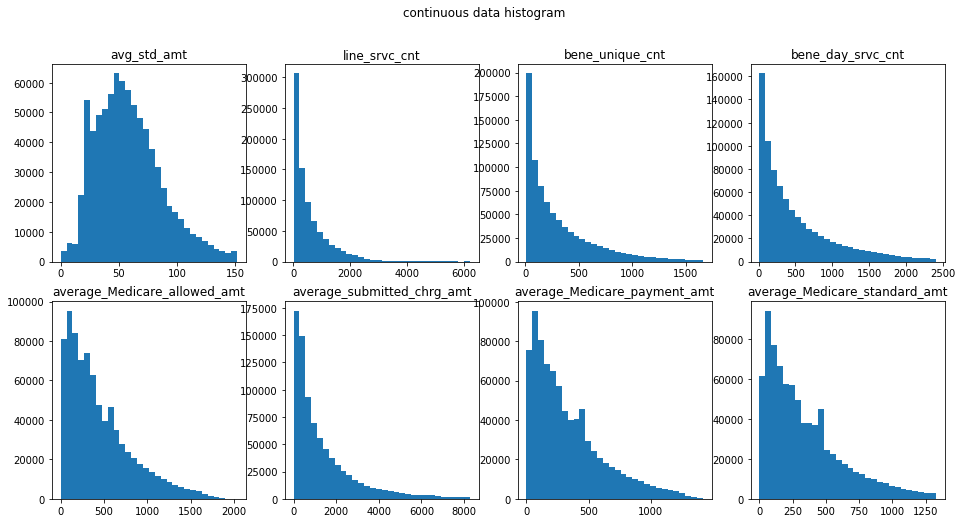

In [18]:
import matplotlib.pyplot as plt

## Showcase the histgram
# data histogram plot

to_be_plot= ["avg_std_amt","line_srvc_cnt","bene_unique_cnt","bene_day_srvc_cnt",\
           "average_Medicare_allowed_amt","average_submitted_chrg_amt","average_Medicare_payment_amt","average_Medicare_standard_amt"]

fig, ax = plt.subplots(2,4,figsize=(16,8))
fig.suptitle("continuous data histogram")
ax = ax.flatten()
looper = 0
for item in to_be_plot:
    ax[looper].hist(x=data_agg[item], bins=30)
    ax[looper].set_title(item, fontsize=12)
    looper = looper + 1

plt.show()

In [19]:
## Feature selection:
# Continuous feature: avg_std_amt, line_srvc_cnt
# Categorical feature: gender, place of service, credentials, entity, provider type

data_cluster = data_agg[["credentials_cleaned","gender_cleaned",\
                         "nppes_entity_code","provider_type_cleaned","place_of_service",\
                        "avg_std_amt","line_srvc_cnt"]]
data_cluster.reset_index(drop=True)
data_cluster

,credentials_cleaned,gender_cleaned,nppes_entity_code,provider_type_cleaned,place_of_service,avg_std_amt,line_srvc_cnt
0,M.D.,M,I,Internal Medicine,F,84.984195,1192.0
1,D.O.,M,I,Family Practice,F,83.159636,412.0
2,M.D.,F,I,Obstetrics & Gynecology,O,42.189412,85.0
3,M.D.,M,I,General Surgery,F,38.011236,89.0
4,M.D.,M,I,Family Practice,O,59.928762,1591.0
...,...,...,...,...,...,...,...
817269,D.C.,M,I,Chiropractic,O,29.561497,581.0
817270,M.D.,F,I,Internal Medicine,O,60.497557,970.0
817271,Other,F,I,Optometry,O,48.805857,70.0
817272,Other,M,I,Nurse Practitioner,O,40.023780,127.0


In [20]:
## One-hot Encoding

one_hot_cat = ["credentials_cleaned","gender_cleaned","nppes_entity_code","provider_type_cleaned","place_of_service"]
pref = ["creds", "gender", "entity", "type", "facility"]

looper = 0
for item in one_hot_cat:
    data_cluster = pd.concat([data_cluster, pd.get_dummies(data_cluster[item],prefix = pref[looper])], axis=1)
    data_cluster.drop([item], axis=1, inplace=True)
    looper = looper + 1

data_cluster.describe()

,avg_std_amt,line_srvc_cnt,creds_CRNA,creds_D.C.,creds_D.O.,creds_DPT,creds_FNP,creds_M.D.,creds_NP,creds_O.D.,...,type_Obstetrics & Gynecology,type_Optometry,type_Other,type_Physical Therapist in Private Practice,type_Physician Assistant,type_Podiatry,type_Psychiatry,"type_Psychologist, Clinical",facility_F,facility_O
count,817274.000000,817274.000000,817274.000000,817274.000000,817274.000000,817274.000000,817274.000000,817274.000000,817274.000000,817274.000000,...,817274.000000,817274.000000,817274.000000,817274.000000,817274.000000,817274.000000,817274.000000,817274.000000,817274.000000,817274.000000
mean,58.393023,586.375108,0.030241,0.037853,0.049216,0.013146,0.014014,0.393250,0.021920,0.020805,...,0.025357,0.033378,0.179191,0.053500,0.080137,0.012647,0.024617,0.018102,0.373865,0.626135
std,28.191456,675.762791,0.171249,0.190840,0.216319,0.113901,0.117547,0.488472,0.146424,0.142730,...,0.157208,0.179622,0.383512,0.225028,0.271506,0.111745,0.154956,0.133319,0.483829,0.483829
min,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.136328,125.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.848355,344.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,75.048396,807.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,151.391333,6216.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

## Normalize the data
scaler = preprocessing.StandardScaler().fit(data_cluster)
data_cluster_norm = scaler.transform(data_cluster)

In [32]:
## Use Scree-plot and Silhouette plot to determine the optimal k-value.

maxCluster = 40
inertia = []

for n in range(2,maxCluster,2):
    print(n)
    k_means = KMeans(n_clusters = n, random_state = 0).fit(data_cluster_norm)
    inertia.append(k_means.inertia_)

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38


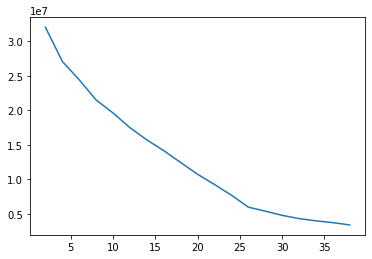

In [33]:
plt.plot(range(2,maxCluster,2), inertia)
plt.show()

In [ ]:
## Use silhouette plot to reaffirm findings

############### The program is too slow for such a large dataset

# silh = []

# for n in range(2,maxCluster,2):
#     print(n)
#     k_means = KMeans(n_clusters = n, random_state = 0).fit(data_cluster_norm)
#     silhouette_avg = silhouette_score(data_cluster_norm, k_means.labels_)
#     silh.append(silhouette_avg)
    
# plt.plot(range(2,maxCluster,2), silh)
# plt.show()

In [35]:
kmeans = KMeans(n_clusters=26, random_state=0).fit(data_cluster_norm)

In [36]:
data_result = pd.concat([data_cluster,pd.DataFrame(kmeans.labels_, columns=["Cluster"])],axis=1)
data_result.head(10)

,avg_std_amt,line_srvc_cnt,creds_CRNA,creds_D.C.,creds_D.O.,creds_DPT,creds_FNP,creds_M.D.,creds_NP,creds_O.D.,...,type_Optometry,type_Other,type_Physical Therapist in Private Practice,type_Physician Assistant,type_Podiatry,type_Psychiatry,"type_Psychologist, Clinical",facility_F,facility_O,Cluster
0,84.984195,1192.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,12
1,83.159636,412.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,18
2,42.189412,85.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,23
3,38.011236,89.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,10
4,59.928762,1591.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,18
5,68.814597,1264.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,12
6,111.102941,51.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,24
7,61.925252,222.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,6
8,25.792110,2402.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,6
9,61.304263,1020.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,18


In [37]:
data_result['Cluster'].value_counts()

2     123268
1      83187
12     70790
18     69007
6      67768
0      42309
3      34069
14     33380
4      33318
9      29934
23     20723
24     20298
16     20117
22     18578
21     17913
11     17003
13     14794
19     14424
10     12269
8      12075
15     11453
17     10744
20     10354
7      10336
25      9777
5       9386
Name: Cluster, dtype: int64

In [40]:
summary = data_result.groupby('Cluster').mean()
summary

,avg_std_amt,line_srvc_cnt,creds_CRNA,creds_D.C.,creds_D.O.,creds_DPT,creds_FNP,creds_M.D.,creds_NP,creds_O.D.,...,type_Obstetrics & Gynecology,type_Optometry,type_Other,type_Physical Therapist in Private Practice,type_Physician Assistant,type_Podiatry,type_Psychiatry,"type_Psychologist, Clinical",facility_F,facility_O
Cluster,,,,,,,,,,,,,,,,,,,,,
0,92.887177,536.869259,0.000000,0.000000,0.163464,0.0,0.0,0.749037,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.916968,0.083032
1,51.725889,422.819197,0.000036,0.000060,0.000012,0.0,0.0,0.000385,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.341688,0.658312
2,63.290040,789.284373,0.000000,0.000000,0.057314,0.0,0.0,0.832901,0.000000,0.0,...,0.000000,0.000032,0.999838,0.000000,0.000105,0.0,0.000000,0.0,0.500414,0.499586
3,44.236320,416.967196,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.148757,0.000029,0.000000,0.0,0.000000,0.0,0.060055,0.939945
4,27.134851,526.714608,0.000000,0.928297,0.001471,0.0,0.0,0.000060,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000060,0.000030,0.0,0.000000,0.0,0.001111,0.998889
5,38.603637,509.756552,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000107,0.999893
6,39.909367,788.838171,0.000000,0.000015,0.000635,0.0,0.0,0.000546,0.000000,0.0,...,0.000000,0.151945,0.264609,0.309291,0.262012,0.0,0.000000,0.0,0.115571,0.884429
7,44.897039,1105.520656,0.000000,0.000000,0.000097,0.0,0.0,0.003386,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.0,0.135062,0.864938
8,21.976328,1392.136124,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.002650,0.997350,0.000000,0.0,0.000000,0.0,0.000000,1.000000


In [43]:
summary.to_csv('C:/Users/James Jia/Desktop/IE 308 Analytics/HW1/output.csv')